In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv('D:/Data Science/Dataset/Disease/disease.csv')
train_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
1,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
2,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
3,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1
4,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1


In [14]:
train_data.shape

(257, 14)

In [4]:
train_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
disease     0
dtype: int64

# Bivariate analysis

In [9]:
features = [feature for feature in train_data.columns if train_data[feature].dtypes != 'O']
features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'disease']

In [13]:
for feature in features:
    print('Unique categories in {} are'.format(feature), len(train_data[feature].unique()))

Unique categories in age are 41
Unique categories in sex are 2
Unique categories in cp are 4
Unique categories in trestbps are 46
Unique categories in chol are 142
Unique categories in fbs are 2
Unique categories in restecg are 3
Unique categories in thalach are 87
Unique categories in exang are 2
Unique categories in oldpeak are 39
Unique categories in slope are 3
Unique categories in ca are 5
Unique categories in thal are 4
Unique categories in disease are 2


In [34]:
#########Analysis of discrete features ###########
discrete_features = [feature for feature in features if len(train_data[feature].unique())<25]
discrete_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'disease']

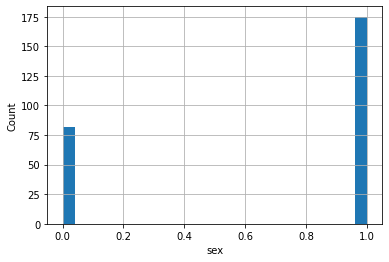

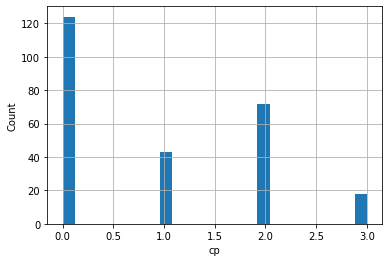

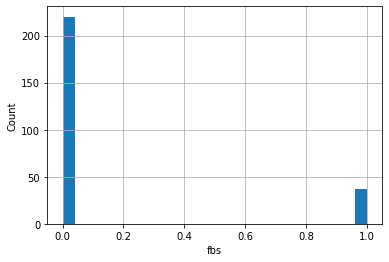

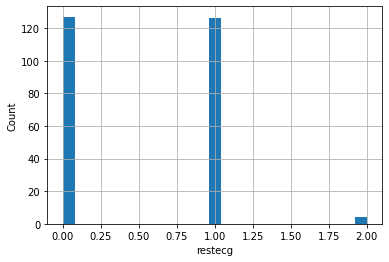

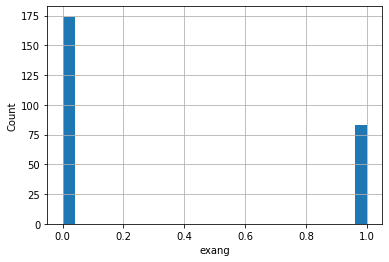

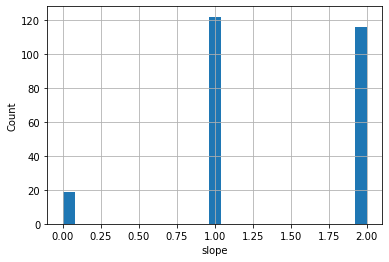

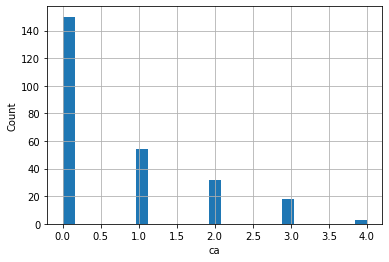

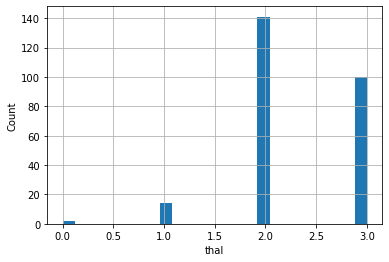

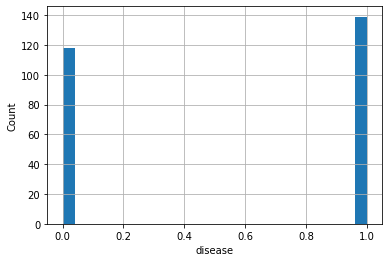

In [35]:
for feature in discrete_features:
    data = train_data.copy()
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()
    

In [36]:
######## Analysis of continuous features ########
continuous_features  = [feature for feature in features if feature not in discrete_features and feature not in ['disease']]
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

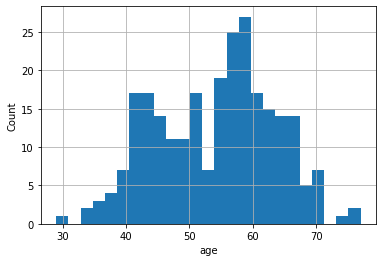

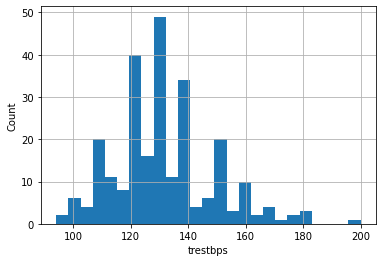

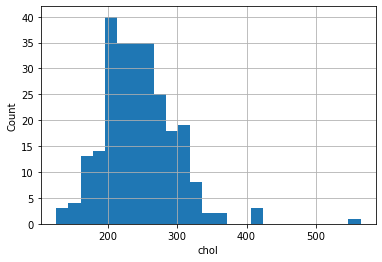

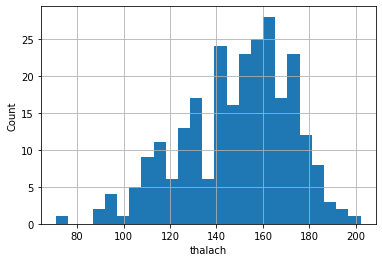

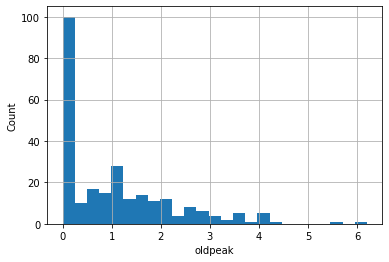

In [40]:
for feature in continuous_features:
    data = train_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()
    

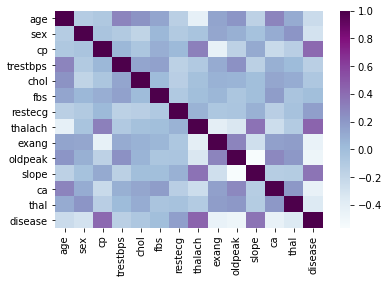

In [42]:
sns.heatmap(train_data.corr(), cmap = 'BuPu')

In [43]:
X = train_data.drop(['disease'],axis=1)
y = train_data['disease']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
LR.fit(X_train_scaled,y_train)
y_pred = LR.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.83      0.87      0.85        46

    accuracy                           0.82        78
   macro avg       0.82      0.81      0.81        78
weighted avg       0.82      0.82      0.82        78



In [47]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train_scaled, y_train)
y_pred = DT.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.60      0.56      0.58        32
           1       0.71      0.74      0.72        46

    accuracy                           0.67        78
   macro avg       0.65      0.65      0.65        78
weighted avg       0.66      0.67      0.66        78



In [53]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train_scaled, y_train)

y_pred = DT.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58        32
           1       0.71      0.74      0.72        46

    accuracy                           0.67        78
   macro avg       0.65      0.65      0.65        78
weighted avg       0.66      0.67      0.66        78



In [55]:
test_data = pd.read_csv('D:/Data Science/Dataset/Disease/unseen_data.csv')
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,112,230,0,1,160,0,0.0,2,1,2
1,35,1,0,126,282,0,0,156,1,0.0,2,0,3
2,54,1,1,192,283,0,0,195,0,0.0,2,1,3
3,54,1,0,140,239,0,1,160,0,1.2,2,0,2
4,66,1,1,160,246,0,1,120,1,0.0,1,3,1


In [56]:
test_op = LR.predict(test_data)

In [57]:
test_op

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)